In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Topics
1. **Getting Started With SQL and BigQuery**: Workflow for handling big datasets with BigQuery and SQL
1. **Select, From & Where**: Foundational components for all SQL queries
1. **Group By, Having & Count**: Get more interesting insights directly from SQL queries
1. **Order By:** Order the results and focus on them ost important data for use case
1. **AS & With** Organize queries for better readability, important for complex queries
1. **Joining Data** Combine data sources for almost all real-world data problems

## 1. Getting Started With SQL and BigQuery

In [5]:
# import Python package for BigQuery
from google.cloud import bigquery

In [8]:
# Create a Client object, retrieving info. from BigQuery
client = bigquery.Client()  # Using Kaggle's public dataset BigQuery integration.

Using Kaggle's public dataset BigQuery integration.


In [12]:
# Dataset: hacker_news, Hacker News posts
# A website focusing on computer science and cybersecurity news.
# https://news.ycombinator.com/
# BigQuery
# ---------
#     \-- project
#              \-- bigquery-public-data
#                           \-- hacker_news

# Construct a reference to the 'hacker_news' dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)
#help(dataset)

In [17]:
# List all the tables in the "hacker_news" dataset
tables = list(client.list_tables(dataset))

# Print names of all tables in the dataset (there are four!)
for table in tables:  
    print(table.table_id)  # only one table - 'full'

full


In [21]:
# Construct a reference ot the 'full' table
table_ref = dataset_ref.table('full')

# API request - fetch table
table = client.get_table(table_ref)
#table   # Table(TableReference(DatasetReference('bigquery-public-data', 'hacker_news'), 'full'))


![](https://storage.googleapis.com/kaggle-media/learn/images/biYqbUB.png)

### Table schema   
The structure of table

In [23]:
# Print the info on all the columns in the 'full' tablre in the 'hacker_news" dataset'
table.schema

[SchemaField('title', 'STRING', 'NULLABLE', 'Story title', (), None),
 SchemaField('url', 'STRING', 'NULLABLE', 'Story url', (), None),
 SchemaField('text', 'STRING', 'NULLABLE', 'Story or comment text', (), None),
 SchemaField('dead', 'BOOLEAN', 'NULLABLE', 'Is dead?', (), None),
 SchemaField('by', 'STRING', 'NULLABLE', "The username of the item's author.", (), None),
 SchemaField('score', 'INTEGER', 'NULLABLE', 'Story score', (), None),
 SchemaField('time', 'INTEGER', 'NULLABLE', 'Unix time', (), None),
 SchemaField('timestamp', 'TIMESTAMP', 'NULLABLE', 'Timestamp for the unix time', (), None),
 SchemaField('type', 'STRING', 'NULLABLE', 'Type of details (comment, comment_ranking, poll, story, job, pollopt)', (), None),
 SchemaField('id', 'INTEGER', 'NULLABLE', "The item's unique id.", (), None),
 SchemaField('parent', 'INTEGER', 'NULLABLE', 'Parent comment ID', (), None),
 SchemaField('descendants', 'INTEGER', 'NULLABLE', 'Number of story or poll descendants', (), None),
 SchemaField

SchemaField('by', 'string', 'NULLABLE', "The username of the item's author.",())

This tells us:

the field (or column) is called by,
the data in this field is strings,
NULL values are allowed, and
it contains the usernames corresponding to each item's author.

In [29]:
# Preview the first five lines of the 'full' table
rows = client.list_rows(table, max_results=12).to_dataframe() # to panda's df
print(type(rows))
rows

<class 'pandas.core.frame.DataFrame'>


,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"I would rather just have wired earbuds, period...",None,zeveb,NaN,1591717736,2020-06-09 15:48:56+00:00,comment,23467666,23456782,NaN,NaN,None
1,None,None,DNS?,None,nly,NaN,1572810465,2019-11-03 19:47:45+00:00,comment,21436112,21435130,NaN,NaN,None
2,None,None,These benchmarks seem pretty good. Filterable...,None,mrkeen,NaN,1591717727,2020-06-09 15:48:47+00:00,comment,23467665,23467426,NaN,NaN,None
3,None,None,Oh really?<p>* Excel alone uses 86.1MB of priv...,None,oceanswave,NaN,1462987532,2016-05-11 17:25:32+00:00,comment,11677248,11676886,NaN,NaN,None
4,None,None,These systems are useless. Of the many flaws:...,None,nyxxie,NaN,1572810473,2019-11-03 19:47:53+00:00,comment,21436113,21435025,NaN,NaN,None
5,None,None,<i>I don&#x27;t worry about the server</i> and...,None,dahfizz,NaN,1566231278,2019-08-19 16:14:38+00:00,comment,20739051,20738305,NaN,NaN,None
6,None,None,Why do you take it as a given that the Secreta...,None,chatmasta,NaN,1425350594,2015-03-03 02:43:14+00:00,comment,9135815,9135800,NaN,NaN,None
7,None,None,Let me know what you guys think so far and if ...,None,augustin1989,NaN,1394076499,2014-03-06 03:28:19+00:00,comment,7351690,7351684,NaN,NaN,None
8,None,None,I often feel that the main result of this priv...,None,jaynetics,NaN,1572810482,2019-11-03 19:48:02+00:00,comment,21436115,21435981,NaN,NaN,None
9,None,None,That is exactly why I generally prefer median-...,None,bugra,NaN,1393290376,2014-02-25 01:06:16+00:00,comment,7294506,7293801,NaN,NaN,None


In [31]:
# Preview the first five entries in the "title" column of the "full" table
client.list_rows(table, selected_fields=table.schema[:1], max_results=5).to_dataframe()

,title
0,None
1,None
2,None
3,None
4,None


### Exercise:    
### Practice the commands to explore the structure of a dataset with crimes in the city of Chicago

**Fetch data from bigquery**     
* dataset = chicago_crime
* project = bigquery-public-data

In [36]:
# moudle, dataset access setup

from google.cloud import bigquery

# Create a 'Client' obj
client = bigquery.Client()

# Construct a ref. to the dataset - 'chicago_crime'
dataset_ref = client.dataset("chicago_crime", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


In [49]:
# count tables in the dataset
tables = list(client.list_tables(dataset))
num_tables = len(tables)
print(num_tables)

# print the table names
for table in tables:
    print(table.table_id)

1
crime


In [71]:
# explore the table schema
# How many columns in the crime table have TIMESTAMP data?

# Construct a reference ot the 'full' table
table_id = "crime"
table_ref = dataset_ref.table(table_id)

# API request - fetch table
table = client.get_table(table_ref)
print("Printing table schema item by item..")
for field in table.schema:
    print(field)
#print(table.schema)
print("-" * 80)

# Counting columns with TIMESTAMP' field.
# List with the field of interest
filed_to_seek = "TIMESTAMP"
fields_of_interest = [item for item in table.schema if filed_to_seek in str(item)]

print(f"{len(fields_of_interest)} column(s) found for \"{filed_to_seek}\" field, from the table \"{table.table_id}\".")
print(fields_of_interest)

Printing table schema item by item..
SchemaField('unique_key', 'INTEGER', 'REQUIRED', None, (), None)
SchemaField('case_number', 'STRING', 'NULLABLE', None, (), None)
SchemaField('date', 'TIMESTAMP', 'NULLABLE', None, (), None)
SchemaField('block', 'STRING', 'NULLABLE', None, (), None)
SchemaField('iucr', 'STRING', 'NULLABLE', None, (), None)
SchemaField('primary_type', 'STRING', 'NULLABLE', None, (), None)
SchemaField('description', 'STRING', 'NULLABLE', None, (), None)
SchemaField('location_description', 'STRING', 'NULLABLE', None, (), None)
SchemaField('arrest', 'BOOLEAN', 'NULLABLE', None, (), None)
SchemaField('domestic', 'BOOLEAN', 'NULLABLE', None, (), None)
SchemaField('beat', 'INTEGER', 'NULLABLE', None, (), None)
SchemaField('district', 'INTEGER', 'NULLABLE', None, (), None)
SchemaField('ward', 'INTEGER', 'NULLABLE', None, (), None)
SchemaField('community_area', 'INTEGER', 'NULLABLE', None, (), None)
SchemaField('fbi_code', 'STRING', 'NULLABLE', None, (), None)
SchemaField('x

In [75]:
# preview the table data in df.
rows = client.list_rows(table, max_results=12).to_dataframe() # to panda's df
rows
"""
Thinking about the question above, there are a few columns that appear to have geographic data. Look at a few values (with the list_rows() command) to see if you can determine their relationship. Two columns will still be hard to interpret. But it should be obvious how the location column relates to latitude and longitude.
"""

'\nThinking about the question above, there are a few columns that appear to have geographic data. Look at a few values (with the list_rows() command) to see if you can determine their relationship. Two columns will still be hard to interpret. But it should be obvious how the location column relates to latitude and longitude.\n'

In [74]:
# When mapping crime locations on map, what two fileds to pull out of the table?
fields_for_plotting = ['latitude', 'longitude']


## 2. Select, From & Where

### Example: What are all the U.S. cities in the OpenAQ dataset?   
dataset: 'openAQ', Fighting air inequality through
open data. https://openaq.org/

In [83]:
# setup

# 1. module for bigquery
from google.cloud import bigquery

# 'Client' obj
client = bigquery.Client()

# Ref. to dataset - 'openaq'
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# List of all tables in the dataset
tables = list(client.list_tables(dataset))

# Print all table names in dataset
for table in tables:
    print(table.table_id)  # The dataset contains only one table, called global_air_quality

Using Kaggle's public dataset BigQuery integration.
global_air_quality


In [86]:
# Ref. to the table - 'global_air_quality'
table_ref = dataset_ref.table("global_air_quality")

# API req. - fetch the table
table = client.get_table(table_ref)

# Preview the first 12 rows of the table in pandas df.
client.list_rows(table, max_results=12).to_dataframe()

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)
5,"Biała, ul. Kmicica",Biała,PL,bc,5.64000,2022-05-10 06:00:00+00:00,µg/m³,GIOS,1.0,52.602534,19.645100,POINT(52.602534 1)
6,"Białystok, ul. Waszyngtona",Białystok,PL,bc,0.28000,2022-05-09 14:00:00+00:00,µg/m³,GIOS,1.0,53.126689,23.155869,POINT(53.126689 1)
7,"Gdańsk, ul. Leczkowa",Gdańsk,PL,bc,0.37260,2022-05-08 17:00:00+00:00,µg/m³,GIOS,1.0,54.380279,18.620274,POINT(54.380279 1)
8,"Zdzieszowice, ul. Piastów",Zdzieszowice,PL,bc,0.08659,2022-05-15 19:00:00+00:00,µg/m³,GIOS,1.0,50.423533,18.120739,POINT(50.423533 1)
9,"Mielec, ul. Biernackiego",Mielec,PL,bc,0.49923,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,50.299128,21.440942,POINT(50.299128 1)


In [87]:
# Prepare query to select all the items from the "city" column where the "country" column is 'US'
query = """
        SELECT city
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
"""

In [91]:
# Submit the query to the dataset

# Create a "Client" object
client = bigquery.Client()

# Set up the query
query_job = client.query(query)

# Run the query, results to pandas df
us_cities = query_job.to_dataframe()

Using Kaggle's public dataset BigQuery integration.


In [92]:
# check the results of the query in df
us_cities

,city
0,HOWARD
1,HOWARD
2,HOWARD
3,HOWARD
4,HOWARD
...,...
1421346,New York-Northern New Jersey-Long Island
1421347,New York-Northern New Jersey-Long Island
1421348,New York-Northern New Jersey-Long Island
1421349,New York-Northern New Jersey-Long Island


In [93]:
# What five cities have the most measurements?
us_cities.city.value_counts().head()

Phoenix-Mesa-Scottsdale                     39414
Los Angeles-Long Beach-Santa Ana            27479
Riverside-San Bernardino-Ontario            26887
New York-Northern New Jersey-Long Island    25417
San Francisco-Oakland-Fremont               22710
Name: city, dtype: int64

In [95]:
# Some more queries
query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """
# Set up the query
query_job = client.query(query)

# Run the query, results to pandas df
entire_table = query_job.to_dataframe()

# check the results of the query in df
entire_table

,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,Laney College,San Francisco-Oakland-Fremont,US,bc,0.48,2022-05-16 13:00:00+00:00,µg/m³,AirNow,1.0,37.793624,-122.263376,POINT(37.793624 1)
1,Portland Near Road,Portland-Vancouver-Beaverton,US,bc,0.38,2022-05-14 07:00:00+00:00,µg/m³,AirNow,1.0,45.399160,-122.745500,POINT(45.39916 1)
2,San Jose - Knox Ave,San Jose-Sunnyvale-Santa Clara,US,bc,0.28,2022-05-17 19:00:00+00:00,µg/m³,AirNow,1.0,37.338202,-121.849892,POINT(37.338202 1)
3,McMillan Reservoir,Washington-Arlington-Alexandria,US,bc,0.23,2022-05-23 02:00:00+00:00,µg/m³,AirNow,1.0,38.921848,-77.013176,POINT(38.921848 1)
4,Howard County Near R,HOWARD,US,bc,0.80,2022-05-14 20:00:00+00:00,µg/m³,AirNow,1.0,39.143197,-76.846192,POINT(39.143197 1)
...,...,...,...,...,...,...,...,...,...,...,...,...
1421346,St. Paul-Harding H.S,Minneapolis-St. Paul-Bloomington,US,pm25,13.00,2022-05-11 16:00:00+00:00,µg/m³,AirNow,1.0,44.959400,-93.035600,POINT(44.9594 1)
1421347,Gresham Centennial H,MULTNOMAH,US,pm25,1.70,2022-05-08 20:00:00+00:00,µg/m³,AirNow,1.0,45.496200,-122.483400,POINT(45.4962 1)
1421348,HICKORY,Hickory-Lenoir-Morganton,US,pm25,12.00,2022-04-28 05:00:00+00:00,µg/m³,AirNow,1.0,35.728889,-81.365556,POINT(35.728889 1)
1421349,STILWELL CASTNET & N,ADAIR,US,pm25,16.00,2022-05-09 04:00:00+00:00,µg/m³,AirNow,1.0,35.750599,-94.669701,POINT(35.750599 1)


In [96]:
# Some more queries
query = """
        SELECT city, country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE country = 'US'
        """
# Set up the query
query_job = client.query(query)

# Run the query, results to pandas df
city_country = query_job.to_dataframe()

# check the results of the query in df
city_country

,city,country
0,HOWARD,US
1,HOWARD,US
2,HOWARD,US
3,HOWARD,US
4,HOWARD,US
...,...,...
1421346,New York-Northern New Jersey-Long Island,US
1421347,New York-Northern New Jersey-Long Island,US
1421348,New York-Northern New Jersey-Long Island,US
1421349,New York-Northern New Jersey-Long Island,US


### Working witht big datasets    
Each Kaggle user can scan 5TB every 30 days for free. Once you hit that limit, you'll have to wait for it to reset.

* **Estimate query cost beforehand - query dry run**
* **Limit the scan size - query safe run**

In [97]:
# Estimate query cost beforehand - query dry run

# Query to get the score column from every row where the type column has value "job"
query = """
        SELECT score, title
        FROM `bigquery-public-data.hacker_news.full`
        WHERE type = "job" 
        """

# Create a QueryJobConfig object to estimate size of query without running it
dry_run_config = bigquery.QueryJobConfig(dry_run=True)

# API request - dry run query to estimate costs
dry_run_query_job = client.query(query, job_config=dry_run_config)

print("This query will process {} bytes.".format(dry_run_query_job.total_bytes_processed))

This query will process 553320240 bytes.


In [98]:
# Limit how much data you are willing to scan.

# Only run the query if it's less than 1 GB
ONE_GB = 1000*1000*1000
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=ONE_GB)

# Set up the query (will only run if it's less than 1 GB)
safe_query_job = client.query(query, job_config=safe_config)

# API request - try to run the query, and return a pandas DataFrame
job_post_scores = safe_query_job.to_dataframe()

# Print average score for job posts
job_post_scores.score.mean()

1.7267060367454068

In [99]:
print(job_post_scores)

       score                                              title
0        1.0  Full-stack Ruby on Rails engineer not afraid t...
1        1.0  Come help us hack the Auto Industry - Dealer S...
2        1.0  First full-stack web developer role @ Airware ...
3        1.0  Generally Intelligent (YC S17) Is Hiring Syste...
4        1.0  Factored Quality (YC W20) Is Hiring a Front En...
...      ...                                                ...
15843    8.0           Mixpanel (S09) hiring Software Engineers
15844   15.0  Missed Work at a Startup but still want to wor...
15845   19.0  Justin.tv is still hiring (join us in our beau...
15846   29.0  Adioso (YC W09) needs FE developers to help ma...
15847   32.0  Work at Socialcam and help the world share mob...

[15848 rows x 2 columns]


### Exercise: Select, From & Where

In [103]:
# Fetches the global_air_quality table from the openaq dataset. 
# Preview the first twelve rows of the table.

# Create a 'Clent' obj
client = bigquery.Client()

# Ref. to 'openaq' dataset, project = 'bigquery-public-data'
dataset_ref = client.dataset("openaq", project="bigquery-public-data")

# API req. - fetch the datset
dataset = client.get_dataset(dataset_ref)

# Ref. to the table 'global_air_quality'
table_ref = dataset_ref.table("global_air_quality")

# API req. - fetch the table
table = client.get_table(table_ref)

# Preview in df
client.list_rows(table, max_results=12).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,location,city,country,pollutant,value,timestamp,unit,source_name,latitude,longitude,averaged_over_in_hours,location_geom
0,"Borówiec, ul. Drapałka",Borówiec,PL,bc,0.85217,2022-04-28 07:00:00+00:00,µg/m³,GIOS,1.0,52.276794,17.074114,POINT(52.276794 1)
1,"Kraków, ul. Bulwarowa",Kraków,PL,bc,0.91284,2022-04-27 23:00:00+00:00,µg/m³,GIOS,1.0,50.069308,20.053492,POINT(50.069308 1)
2,"Płock, ul. Reja",Płock,PL,bc,1.41000,2022-03-30 04:00:00+00:00,µg/m³,GIOS,1.0,52.550938,19.709791,POINT(52.550938 1)
3,"Elbląg, ul. Bażyńskiego",Elbląg,PL,bc,0.33607,2022-05-03 13:00:00+00:00,µg/m³,GIOS,1.0,54.167847,19.410942,POINT(54.167847 1)
4,"Piastów, ul. Pułaskiego",Piastów,PL,bc,0.51000,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,52.191728,20.837489,POINT(52.191728 1)
5,"Biała, ul. Kmicica",Biała,PL,bc,5.64000,2022-05-10 06:00:00+00:00,µg/m³,GIOS,1.0,52.602534,19.645100,POINT(52.602534 1)
6,"Białystok, ul. Waszyngtona",Białystok,PL,bc,0.28000,2022-05-09 14:00:00+00:00,µg/m³,GIOS,1.0,53.126689,23.155869,POINT(53.126689 1)
7,"Gdańsk, ul. Leczkowa",Gdańsk,PL,bc,0.37260,2022-05-08 17:00:00+00:00,µg/m³,GIOS,1.0,54.380279,18.620274,POINT(54.380279 1)
8,"Zdzieszowice, ul. Piastów",Zdzieszowice,PL,bc,0.08659,2022-05-15 19:00:00+00:00,µg/m³,GIOS,1.0,50.423533,18.120739,POINT(50.423533 1)
9,"Mielec, ul. Biernackiego",Mielec,PL,bc,0.49923,2022-05-11 05:00:00+00:00,µg/m³,GIOS,1.0,50.299128,21.440942,POINT(50.299128 1)


In [110]:
# 1) Units of measurement
# Which countries have reported pollution levels in units of "ppm"? 

# Set first_query to an SQL query that pulls the appropriate entries from the country column.
first_query = """
        SELECT DISTINCT country
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE unit = "ppm"
        """
# Set query scan limit to 10GB
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
first_query_job = client.query(first_query, job_config=safe_config)

# API req. - run the query, return to pands of
first_results = first_query_job.to_dataframe()

# Prievew the df, first 12 rows
print(first_results.head(12))

   country
0       AR
1       TW
2       IL
3       CO
4       EC
5       RW
6       AU
7       BR
8       CA
9       MX
10      TH
11      US


In [111]:
# 2) High air quality
# Which pollution levels were reported to be exactly 0?
# Set zero_pollution_query to select all columns of the rows where the value column is 0.
# Set zero_pollution_results to a pandas DataFrame containing the query results.

# Query to select all columns where pollution levels are exactly 0
zero_pollution_query = """
        SELECT *
        FROM `bigquery-public-data.openaq.global_air_quality`
        WHERE value = 0
        """
# Set up the query with safe config
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(zero_pollution_query, job_config=safe_config)

# API req. - run the query and return a pandas DataFrame
zero_pollution_results = query_job.to_dataframe()

# Preview df
print(zero_pollution_results.head())

                       location      city country pollutant  value  \
0     Zielonka, Bory Tucholskie  Zielonka      PL        bc    0.0   
1    Toruń, ul. Przy Kaszowniku     Toruń      PL        bc    0.0   
2           Kielce, ul. Targowa    Kielce      PL        bc    0.0   
3     Zielonka, Bory Tucholskie  Zielonka      PL        bc    0.0   
4  Koszalin, ul. Armii Krajowej  Koszalin      PL        bc    0.0   

                  timestamp   unit source_name  latitude  longitude  \
0 2022-04-29 14:00:00+00:00  µg/m³        GIOS       1.0  53.662136   
1 2022-04-19 04:00:00+00:00  µg/m³        GIOS       1.0  53.017628   
2 2022-05-07 17:00:00+00:00  µg/m³        GIOS       1.0  50.878998   
3 2022-05-19 14:00:00+00:00  µg/m³        GIOS       1.0  53.662136   
4 2022-05-12 20:00:00+00:00  µg/m³        GIOS       1.0  54.193986   

   averaged_over_in_hours       location_geom  
0               17.933986  POINT(53.662136 1)  
1               18.612808  POINT(53.017628 1)  
2       

## 3. Group By, Having & Count    
Interesting insights directly from queries like:    
* How many of each kind of fruit has our store sold?
* How many species of animal has the vet office treated?
* **COUNT(), SUM(), AVG(), MIN(), MAX(), GROUP BY, GROUP BY HAVING**

### Example: Which Hacker News comments generated the most discussion?   
* The Hacker News dataset contains information on stories and comments from the Hacker News social networking site.   
* Will work with `full` table

In [117]:
# setup, connect , fetch

from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "hacker_news" dataset
dataset_ref = client.dataset("hacker_news", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Print the list of tables in dataset
tables = list(client.list_tables(dataset))
for table in tables:
    print(table.table_id)

# Construct a reference to the "full" table
table_ref = dataset_ref.table("full")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "comments" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.
full


,title,url,text,dead,by,score,time,timestamp,type,id,parent,descendants,ranking,deleted
0,None,None,"I would rather just have wired earbuds, period...",None,zeveb,NaN,1591717736,2020-06-09 15:48:56+00:00,comment,23467666,23456782,NaN,NaN,None
1,None,None,DNS?,None,nly,NaN,1572810465,2019-11-03 19:47:45+00:00,comment,21436112,21435130,NaN,NaN,None
2,None,None,These benchmarks seem pretty good. Filterable...,None,mrkeen,NaN,1591717727,2020-06-09 15:48:47+00:00,comment,23467665,23467426,NaN,NaN,None
3,None,None,Oh really?<p>* Excel alone uses 86.1MB of priv...,None,oceanswave,NaN,1462987532,2016-05-11 17:25:32+00:00,comment,11677248,11676886,NaN,NaN,None
4,None,None,These systems are useless. Of the many flaws:...,None,nyxxie,NaN,1572810473,2019-11-03 19:47:53+00:00,comment,21436113,21435025,NaN,NaN,None


Let's use the table to see which comments generated the most replies. Since:

the parent column indicates the comment that was replied to, and
the id column has the unique ID used to identify each comment,
we can GROUP BY the parent column and COUNT() the id column in order to figure out the number of comments that were made as responses to a specific comment. (This might not make sense immediately -- take your time here to ensure that everything is clear!)

Furthermore, since we're only interested in popular comments, we'll look at comments with more than ten replies. So, we'll only return groups HAVING more than ten ID's.

In [122]:
# Query to select comments that received more than 10 replies
query_popular = """
        SELECT parent, COUNT(id)
        FROM `bigquery-public-data.hacker_news.full`
        GROUP BY parent
        HAVING COUNT(id) > 10
        """

In [123]:
# Set up the query with quata limited to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_popular, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
popular_comments = query_job.to_dataframe()

# Print the first twelve rows of the DataFrame
popular_comments.head(12)

,parent,f0_
0,11266796.0,56
1,9118977.0,48
2,20584311.0,755
3,28474997.0,52
4,23734093.0,63
5,7239333.0,43
6,27335574.0,135
7,17489934.0,77
8,22577132.0,127
9,24789379.0,89


A couple hints to make your queries even better:

The column resulting from COUNT(id) was called f0__. That's not a very descriptive name. You can change the name by adding AS NumPosts after you specify the aggregation. This is called aliasing, and it will be covered in more detail in an upcoming lesson.
If you are ever unsure what to put inside the COUNT() function, you can do **COUNT(1)** to count the rows in each group. Most people find it especially readable, because we know it's not focusing on other columns. It also scans less data than if supplied column names (making it faster and using less of your data access quota).

In [133]:
# Improved version of earlier query, now with aliasing & improved readability
query_improved = """
                 SELECT parent, COUNT(1) AS NumPosts
                 FROM `bigquery-public-data.hacker_news.full`
                 GROUP BY parent
                 HAVING COUNT(1) > 10
                 """

safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_improved, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
improved_df = query_job.to_dataframe()

# Print the first five rows of the DataFrame
improved_df.head(12)

,parent,NumPosts
0,33468611.0,49
1,6761297.0,108
2,9185356.0,83
3,13682949.0,298
4,31099186.0,81
5,11340510.0,121
6,1869046.0,55
7,20990583.0,164
8,5663157.0,45
9,11456907.0,46


**Note on using GROUP BY**    
Note that because it tells SQL how to apply aggregate functions (like COUNT()), it doesn't make sense to use GROUP BY without an aggregate function. Similarly, if you have any GROUP BY clause, then all variables must be passed to either a

1. GROUP BY command, or
1. an aggregation function.

### Exercise: Group By, Having & Count

In [142]:
# 1) Prolific commenters
# Hacker News would like to send awards to everyone who has written more than 
# 10,000 posts. Write a query that returns:
# all authors with more than 10,000 posts 
# as well as their post counts. 
# Call the column with post counts NumPosts.


# Query to select prolific commenters and post counts
prolific_commenters_query = """
                 SELECT `by`, COUNT(id) as NumPosts
                 FROM `bigquery-public-data.hacker_news.full`
                 GROUP BY `by`
                 HAVING COUNT(id) > 10000
                                  """# Your code goes here

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(prolific_commenters_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
prolific_commenters = query_job.to_dataframe()

# View top few rows of results
prolific_commenters.head(12)


,by,NumPosts
0,dredmorbius,26568
1,amelius,20985
2,pjc50,21417
3,wmf,15814
4,WalterBright,18455
5,tptacek,58511
6,nradov,13138
7,marcosdumay,12077
8,Animats,18798
9,ColinWright,14885


In [132]:
deleted_posts_query = """SELECT COUNT(1) AS num_deleted_posts
                           FROM `bigquery-public-data.hacker_news.full`
                           WHERE deleted = True """

In [146]:
# Query to count the delted posts
deleted_posts_query = """SELECT COUNT(1) AS num_deleted_posts
                           FROM `bigquery-public-data.hacker_news.full`
                           WHERE deleted = True """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(deleted_posts_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
deleted_posts = query_job.to_dataframe()

# View top few rows of results
deleted_posts

,num_deleted_posts
0,968172


## Order By

### Example: Which day of the week has the most fatal motor accidents?
Let's use the US Traffic Fatality Records database, which contains information on traffic accidents in the US where at least one person died.

We'll investigate the accident_2015 table.

In [147]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "nhtsa_traffic_fatalities" dataset
dataset_ref = client.dataset("nhtsa_traffic_fatalities", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "accident_2015" table
table_ref = dataset_ref.table("accident_2015")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "accident_2015" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,state_number,state_name,consecutive_number,number_of_vehicle_forms_submitted_all,number_of_motor_vehicles_in_transport_mvit,number_of_parked_working_vehicles,number_of_forms_submitted_for_persons_not_in_motor_vehicles,number_of_persons_not_in_motor_vehicles_in_transport_mvit,number_of_persons_in_motor_vehicles_in_transport_mvit,number_of_forms_submitted_for_persons_in_motor_vehicles,...,minute_of_ems_arrival_at_hospital,related_factors_crash_level_1,related_factors_crash_level_1_name,related_factors_crash_level_2,related_factors_crash_level_2_name,related_factors_crash_level_3,related_factors_crash_level_3_name,number_of_fatalities,number_of_drunk_drivers,timestamp_of_crash
0,30,Montana,300019,5,5,0,0,0,7,7,...,45,0,None,0,None,0,None,1,0,2015-03-28 14:58:00+00:00
1,39,Ohio,390099,7,7,0,0,0,15,15,...,24,27,Backup Due to Prior Crash,0,None,0,None,1,0,2015-02-14 11:19:00+00:00
2,49,Utah,490123,16,16,0,0,0,28,28,...,99,0,None,0,None,0,None,1,0,2015-04-14 12:24:00+00:00
3,48,Texas,481184,6,5,1,0,5,5,10,...,99,0,None,0,None,0,None,1,0,2015-05-27 16:40:00+00:00
4,41,Oregon,410333,11,11,0,0,0,14,14,...,99,0,None,0,None,0,None,1,0,2015-11-17 18:17:00+00:00


In [148]:
# Query to find out the number of accidents for each day of the week
query = """
        SELECT COUNT(consecutive_number) AS num_accidents, 
               EXTRACT(DAYOFWEEK FROM timestamp_of_crash) AS day_of_week
        FROM `bigquery-public-data.nhtsa_traffic_fatalities.accident_2015`
        GROUP BY day_of_week
        ORDER BY num_accidents DESC
        """

In [149]:
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**9)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
accidents_by_day = query_job.to_dataframe()

# Print the DataFrame
accidents_by_day

,num_accidents,day_of_week
0,5659,7
1,5298,1
2,4916,6
3,4460,5
4,4182,4
5,4038,2
6,3985,3


### Exercise: Order By   
The World Bank has made tons of interesting education data available through BigQuery. Run the following cell to see the first few rows of the ``international_education table from the `world_bank_intl_education` dataset.

In [150]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "world_bank_intl_education" dataset
dataset_ref = client.dataset("world_bank_intl_education", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "international_education" table
table_ref = dataset_ref.table("international_education")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "international_education" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,country_name,country_code,indicator_name,indicator_code,value,year
0,Chad,TCD,"Enrolment in lower secondary education, both s...",UIS.E.2,321921.0,2012
1,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,68809.0,2006
2,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,30551.0,1999
3,Chad,TCD,"Enrolment in upper secondary education, both s...",UIS.E.3,79784.0,2007
4,Chad,TCD,"Repeaters in primary education, all grades, bo...",UIS.R.1,282699.0,2006


The value in the `indicator_code` column describes what type of data is shown in a given row.

One interesting indicator code is `SE.XPD.TOTL.GD.ZS`, which corresponds to "Government expenditure on education as % of GDP (%)".

**1) Government expenditure on education¶**   
Which countries spend the largest fraction of GDP on education?

To answer this question, consider only the rows in the dataset corresponding to indicator code SE.XPD.TOTL.GD.ZS, and write a query that returns the average value in the value column for each country in the dataset between the years 2010-2017 (including 2010 and 2017 in the average).

Requirements:

* Your results should have the country name rather than the country code. You will have one row for each country.
* The aggregate function for average is AVG(). Use the name avg_ed_spending_pct for the column created by this aggregation.
* Order the results so the countries that spend the largest fraction of GDP on education show up first.


In [152]:
# Your code goes here
country_spend_pct_query = """
                          SELECT country_name, AVG(value) AS avg_ed_spending_pct
                          FROM `bigquery-public-data.world_bank_intl_education.international_education`
                          WHERE indicator_code = 'SE.XPD.TOTL.GD.ZS' and year >= 2010 and year <= 2017
                          GROUP BY country_name
                          ORDER BY avg_ed_spending_pct DESC
                          """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 1 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
country_spend_pct_query_job = client.query(country_spend_pct_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
country_spending_results = country_spend_pct_query_job.to_dataframe()

# View top few rows of results
country_spending_results.head()


,country_name,avg_ed_spending_pct
0,Cuba,12.837270
1,"Micronesia, Fed. Sts.",12.467750
2,Solomon Islands,10.001080
3,Moldova,8.372153
4,Namibia,8.349610


**2) Identify interesting codes to explore**¶   
The last question started by telling you to focus on rows with the code SE.XPD.TOTL.GD.ZS. But how would you find more interesting indicator codes to explore?

There are 1000s of codes in the dataset, so it would be time consuming to review them all. But many codes are available for only a few countries. When browsing the options for different codes, you might restrict yourself to codes that are reported by many countries.

**Write a query below that selects the indicator code and indicator name for all codes with at least 175 rows in the year 2016.**

Requirements:

* You should have one row for each indicator code.
* The columns in your results should be called `indicator_code`, `indicator_name`, and `num_rows`.
* Only select codes with 175 or more rows in the raw database (exactly 175 rows would be included).
* To get both the `indicator_code` and `indicator_name` in your resulting DataFrame, you need to include both in your **SELECT** statement (in addition to a **COUNT()** aggregation). This requires you to include both in your **GROUP BY** clause.
* Order from results most frequent to least frequent.

In [155]:
# Your code goes here
code_count_query = """
    SELECT indicator_code, indicator_name, COUNT(1) AS num_rows
    FROM `bigquery-public-data.world_bank_intl_education.international_education`
    WHERE year = 2016
    GROUP BY indicator_code, indicator_name
    HAVING COUNT(1) >= 175
    ORDER BY num_rows DESC
"""

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
code_count_query_job = client.query(code_count_query, job_config=safe_config)

# API request - run the query, and return a pandas DataFrame
code_count_results = code_count_query_job.to_dataframe()

# View top few rows of results
code_count_results.head()



,indicator_code,indicator_name,num_rows
0,SP.POP.GROW,Population growth (annual %),232
1,SP.POP.TOTL,"Population, total",232
2,IT.NET.USER.P2,Internet users (per 100 people),223
3,SH.DYN.MORT,"Mortality rate, under-5 (per 1,000)",213
4,SP.POP.0014.TO,"Population, ages 0-14, total",213


## 5. As & With    
Organize your query for better readability. This becomes especially important for complex queries.   

SQL queries are getting pretty long, which can make them hard understand (and debug).

Use AS and WITH to tidy up your queries and make them easier to read.

Along the way, we'll use the familiar pets table, but now it includes the ages of the animals.

### WITH ... AS    
On its own, AS is a convenient way to clean up the data returned by your query. It's even more powerful when combined with WITH in what's called a "common table expression".

A **common table expression** (or **CTE**) is a temporary table that you return within your query. CTEs are helpful for splitting your queries into readable chunks, and you can write queries against them.

**CTEs only exist inside the query where you create them**, and you can't reference them in later queries. So, any query that uses a CTE is always broken into two parts: **(1) first, we create the CTE**, and then **(2) we write a query that uses the CTE**.

### Example: How many Bitcoin transactions are made per month?    
We're going to use a CTE to find out how many Bitcoin transactions were made each day for the entire timespan of a bitcoin transaction dataset.

We'll investigate the transactions table. Here is a view of the first few rows. (The corresponding code is hidden, but you can un-hide it by clicking on the "Code" button below.)

In [156]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "crypto_bitcoin" dataset
dataset_ref = client.dataset("crypto_bitcoin", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "transactions" table
table_ref = dataset_ref.table("transactions")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "transactions" table
client.list_rows(table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,hash,size,virtual_size,version,lock_time,block_hash,block_number,block_timestamp,block_timestamp_month,input_count,output_count,input_value,output_value,is_coinbase,fee,inputs,outputs
0,a16f3ce4dd5deb92d98ef5cf8afeaf0775ebca408f708b...,275,275,1,0,00000000dc55860c8a29c58d45209318fa9e9dc2c1833a...,181,2009-01-12 06:02:13+00:00,2009-01-01,1,2,4000000000.000000000,4000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'f4184...","[{'index': 0, 'script_asm': '04b5abd412d4341b4..."
1,591e91f809d716912ca1d4a9295e70c3e78bab077683f7...,275,275,1,0,0000000054487811fc4ff7a95be738aa5ad9320c394c48...,182,2009-01-12 06:12:16+00:00,2009-01-01,1,2,3000000000.000000000,3000000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'a16f3...","[{'index': 0, 'script_asm': '0401518fa1d1e1e3e..."
2,12b5633bad1f9c167d523ad1aa1947b2732a865bf5414e...,276,276,1,0,00000000f46e513f038baf6f2d9a95b2a28d8a6c985bcf...,183,2009-01-12 06:34:22+00:00,2009-01-01,1,2,2900000000.000000000,2900000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '591e9...","[{'index': 0, 'script_asm': '04baa9d3665315562..."
3,828ef3b079f9c23829c56fe86e85b4a69d9e06e5b54ea5...,276,276,1,0,00000000fb5b44edc7a1aa105075564a179d65506e2bd2...,248,2009-01-12 20:04:20+00:00,2009-01-01,1,2,2800000000.000000000,2800000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': '12b56...","[{'index': 0, 'script_asm': '04bed827d37474bef..."
4,35288d269cee1941eaebb2ea85e32b42cdb2b04284a56d...,277,277,1,0,00000000689051c09ff2cd091cc4c22c10b965eb8db3ad...,545,2009-01-15 05:48:32+00:00,2009-01-01,1,2,2500000000.000000000,2500000000.000000000,False,0E-9,"[{'index': 0, 'spent_transaction_hash': 'd71fd...","[{'index': 0, 'script_asm': '044a656f065871a35..."


Since the block_timestamp column contains the date of each transaction in DATETIME format, we'll convert these into DATE format using the DATE() command.

We do that using a CTE, and then the next part of the query counts the number of transactions for each date and sorts the table so that earlier dates appear first.

In [157]:
# Query to select the number of transactions per date, sorted by date
query_with_CTE = """ 
                 WITH time AS 
                 (
                     SELECT DATE(block_timestamp) AS trans_date
                     FROM `bigquery-public-data.crypto_bitcoin.transactions`
                 )
                 SELECT COUNT(1) AS transactions,
                        trans_date
                 FROM time
                 GROUP BY trans_date
                 ORDER BY trans_date
                 """
# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query_with_CTE, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
transactions_by_date = query_job.to_dataframe()

# Print the first five rows
transactions_by_date.head()


,transactions,trans_date
0,1,2009-01-03
1,14,2009-01-09
2,61,2009-01-10
3,93,2009-01-11
4,101,2009-01-12


Since they're returned sorted, we can easily plot the raw results to show us the number of Bitcoin transactions per day over the whole timespan of this dataset.

<Axes: xlabel='trans_date'>

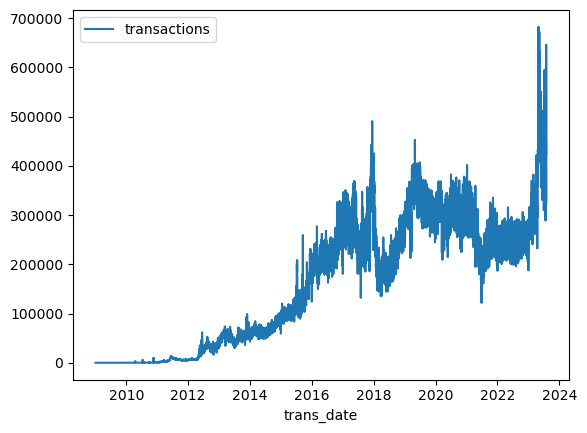

In [158]:
transactions_by_date.set_index('trans_date').plot()

As you can see, common table expressions (**CTEs**) let you **shift a lot of your data cleaning into SQL**. That's an especially good thing in the case of BigQuery, because **it is vastly faster than doing the work in Pandas**.

### Exercise: As & With  

You are getting to the point where you can own an analysis from beginning to end. So you'll do more data exploration in this exercise than you've done before.    

You'll work with a dataset about taxi trips in the city of Chicago


In [159]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "chicago_taxi_trips" dataset
dataset_ref = client.dataset("chicago_taxi_trips", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

Using Kaggle's public dataset BigQuery integration.


**Exercises:  
You are curious how much slower traffic moves when traffic volume is high. This involves a few steps.**

In [161]:
# 1) Find the data
# Before you can access the data, you need to find the table name with the data

tables = list(client.list_tables(dataset))
# print the table names
for table in tables:
    print(table.table_id)

# Write the table name as a string below
table_name = "taxi_trips"

taxi_trips


In [163]:
# 2) Peek at the data
# Use the next code cell to peek at the top few rows of the data. Inspect the data and see if any issues with data quality are immediately obvious.

# Construct a reference to the "taxi_trips" table
table_ref = dataset_ref.table("taxi_trips")

# API request - fetch the table
table = client.get_table(table_ref)

# Preview the first five lines of the "taxi_trips" table
client.list_rows(table, max_results=5).to_dataframe()

,unique_key,taxi_id,trip_start_timestamp,trip_end_timestamp,trip_seconds,trip_miles,pickup_census_tract,dropoff_census_tract,pickup_community_area,dropoff_community_area,...,extras,trip_total,payment_type,company,pickup_latitude,pickup_longitude,pickup_location,dropoff_latitude,dropoff_longitude,dropoff_location
0,ef162bbd5b8e8dd6a079af0c548e46373f516be9,4b869d0c376995077b81f82d8549e484a62780a4a92277...,2013-02-22 10:15:00+00:00,2013-02-22 10:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,24.00,Credit Card,Park Ridge Taxi and Livery,NaN,NaN,None,NaN,NaN,None
1,9e75482e3d4773ee5ea5e23da3dec555c114e423,bee9782d8d7310bc1b902a8fe547baf0da4c95165bd81f...,2013-02-12 06:45:00+00:00,2013-02-12 06:45:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,47.34,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,None,NaN,NaN,None
2,3e1c8cf338a4124cc23670d9a598e2e7d201d6a9,e428b282d868d83ee36a566f79e7e8926c9c3c631809cc...,2013-02-17 07:00:00+00:00,2013-02-17 07:00:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,7.35,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,None,NaN,NaN,None
3,be32dc97303848671c115c66bc54b8585d553086,5c78e836fa4fd7ecadd6d3f7d9224f2af888dedeec3304...,2013-02-14 21:30:00+00:00,2013-02-14 21:30:00+00:00,NaN,0.0,NaN,NaN,NaN,NaN,...,0.0,18.81,Credit Card,Chicago Elite Cab Corp.,NaN,NaN,None,NaN,NaN,None
4,3fdc2b35dcc0d3e1ec1771f755330fc2da10d6e1,4c2ec0420ff3c82c7c0e76e2e6cf96208c2cff8b766c06...,2013-02-15 00:30:00+00:00,2013-02-15 00:30:00+00:00,0.0,0.0,NaN,NaN,NaN,NaN,...,0.0,5.00,Credit Card,Taxi Affiliation Services,NaN,NaN,None,NaN,NaN,None


Some location fields have values of None or NaN. That is a problem if we want to use those fields.

In [164]:
# 3) Determine when this data is from
# If the data is sufficiently old, we might be careful before assuming the data is still relevant to traffic patterns today. Write a query that counts the number of trips in each year.
# Your results should have two columns:
# year - the year of the trips
# num_trips - the number of trips in that year

# Your code goes here
rides_per_year_query = """
        SELECT EXTRACT(YEAR FROM trip_start_timestamp) AS year
            , COUNT(unique_key) AS num_trips
        FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
        GROUP BY year
        ORDER BY year
"""

# Set up the query (cancel the query if it would use too much of 
# your quota)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**11)
rides_per_year_query_job = client.query(rides_per_year_query, job_config=safe_config) # Your code goes here

# API request - run the query, and return a pandas DataFrame
rides_per_year_result = rides_per_year_query_job.to_dataframe() # Your code goes here

# View results
print(rides_per_year_result)

    year  num_trips
0   2013   27217300
1   2014   37395079
2   2015   32385527
3   2016   31756403
4   2017   24979611
5   2018   20731105
6   2019   16476440
7   2020    3888831
8   2021    3947677
9   2022    6382071
10  2023    3234974


In [166]:
# 4) Dive slightly deeper
# You'd like to take a closer look at rides from 2016. 
# Copy the query you used above in rides_per_year_query into the cell below for rides_per_month_query. Then modify it in two ways:
# Use a WHERE clause to limit the query to data from 2016.
# Modify the query to extract the month rather than the year.

# Your code goes here
rides_per_month_query = """
            SELECT 
                EXTRACT(MONTH FROM trip_start_timestamp) AS month, 
                COUNT(1) AS num_trips
            FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
            WHERE EXTRACT(YEAR FROM trip_start_timestamp) = 2016
            GROUP BY month
            ORDER BY month
            """ 

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**11)
rides_per_month_query_job = client.query(rides_per_month_query, job_config=safe_config) # Your code goes here

# API request - run the query, and return a pandas DataFrame
rides_per_month_result = rides_per_month_query_job.to_dataframe() # Your code goes here

# View results
rides_per_month_result


,month,num_trips
0,1,2510389
1,2,2568433
2,3,2851106
3,4,2854290
4,5,2859147
5,6,2841872
6,7,2682912
7,8,2629482
8,9,2532650
9,10,2725340


In [167]:
# 5) Write the query
# It's time to step up the sophistication of your queries. Write a query that shows, for each hour of the day in the dataset, the corresponding number of trips and average speed.
# Your results should have three columns:
# hour_of_day - sort by this column, which holds the result of extracting the hour from trip_start_timestamp.
# num_trips - the count of the total number of trips in each hour of the day (e.g. how many trips were started between 6AM and 7AM, independent of which day it occurred on).
# avg_mph - the average speed, measured in miles per hour, for trips that started in that hour of the day. Average speed in miles per hour is calculated as 3600 * SUM(trip_miles) / SUM(trip_seconds). (The value 3600 is used to convert from seconds to hours.)
# Restrict your query to data meeting the following criteria:
#    trip_start_timestamp > 2016-01-01 and < 2016-04-01
#    trip_seconds > 0 and trip_miles > 0
# You will use a common table expression (CTE) to select just the relevant rides. Because this dataset is very big, this CTE should select only the columns you'll need to create the final output (though you won't actually create those in the CTE -- instead you'll create those in the later SELECT statement below the CTE).
# This is a much harder query than anything you've written so far. Good luck!

# Your code goes here
speeds_query = """
               WITH RelevantRides AS
               (
                   SELECT EXTRACT(HOUR FROM trip_start_timestamp) AS hour_of_day, 
                          trip_miles, 
                          trip_seconds
                   FROM `bigquery-public-data.chicago_taxi_trips.taxi_trips`
                   WHERE trip_start_timestamp > '2016-01-01' AND 
                         trip_start_timestamp < '2016-04-01' AND 
                         trip_seconds > 0 AND 
                         trip_miles > 0
               )
               SELECT hour_of_day, 
                      COUNT(1) AS num_trips, 
                      3600 * SUM(trip_miles) / SUM(trip_seconds) AS avg_mph
               FROM RelevantRides
               GROUP BY hour_of_day
               ORDER BY hour_of_day
               """

# Set up the query
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
speeds_query_job = client.query(speeds_query,job_config=safe_config) # Your code here

# API request - run the query, and return a pandas DataFrame
speeds_result = speeds_query_job.to_dataframe() # Your code here

# View results
print(speeds_result)

    hour_of_day  num_trips    avg_mph
0             0     203092  20.191744
1             1     178046  18.628598
2             2     143447  18.444370
3             3     108899  19.273107
4             4      80067  27.599669
5             5      75786  33.065604
6             6     102254  28.533112
7             7     187585  19.884592
8             8     284223  16.787900
9             9     306854  18.434124
10           10     279762  20.091309
11           11     294006  20.926340
12           12     311522  20.063901
13           13     317225  19.766321
14           14     312629  19.309655
15           15     319953  18.515564
16           16     349455  17.168814
17           17     394324  14.641375
18           18     431991  15.381995
19           19     416743  17.795008
20           20     356279  20.347398
21           21     318363  22.584731
22           22     289886  21.129847
23           23     241690  20.259757


# 6. Join

#### Example: How many files are covered by each type of software license?
GitHub is the most popular place to collaborate on software projects. A GitHub repository (or repo) is a collection of files associated with a specific project.

Most repos on GitHub are shared under a specific legal license, which determines the legal restrictions on how they are used. For our example, we're going to look at how many different files have been released under each license.

We'll work with two tables in the database. The first table is the licenses table, which provides the name of each GitHub repo (in the repo_name column) and its corresponding license. Here's a view of the first five rows.

In [169]:
from google.cloud import bigquery

# Create a "Client" object
client = bigquery.Client()

# Construct a reference to the "github_repos" dataset
dataset_ref = client.dataset("github_repos", project="bigquery-public-data")

# API request - fetch the dataset
dataset = client.get_dataset(dataset_ref)

# Construct a reference to the "licenses" table
licenses_ref = dataset_ref.table("licenses")

# API request - fetch the table
licenses_table = client.get_table(licenses_ref)

# Preview the first five lines of the "licenses" table
client.list_rows(licenses_table, max_results=5).to_dataframe()

Using Kaggle's public dataset BigQuery integration.


,repo_name,license
0,autarch/Dist-Zilla-Plugin-Test-TidyAll,artistic-2.0
1,thundergnat/Prime-Factor,artistic-2.0
2,kusha-b-k/Turabian_Engin_Fan,artistic-2.0
3,onlinepremiumoutlet/onlinepremiumoutlet.github.io,artistic-2.0
4,huangyuanlove/LiaoBa_Service,artistic-2.0


The second table is the sample_files table, which provides, among other information, the GitHub repo that each file belongs to (in the repo_name column)

In [170]:
# Construct a reference to the "sample_files" table
files_ref = dataset_ref.table("sample_files")

# API request - fetch the table
files_table = client.get_table(files_ref)

# Preview the first five lines of the "sample_files" table
client.list_rows(files_table, max_results=5).to_dataframe()

,repo_name,ref,path,mode,id,symlink_target
0,EOL/eol,refs/heads/master,generate/vendor/railties,40960,0338c33fb3fda57db9e812ac7de969317cad4959,/usr/share/rails-ruby1.8/railties
1,np/ling,refs/heads/master,tests/success/merger_seq_inferred.t/merger_seq...,40960,dd4bb3d5ecabe5044d3fa5a36e0a9bf7ca878209,../../../fixtures/all/merger_seq_inferred.ll
2,np/ling,refs/heads/master,fixtures/sequence/lettype.ll,40960,8fdf536def2633116d65b92b3b9257bcf06e3e45,../all/lettype.ll
3,np/ling,refs/heads/master,fixtures/failure/wrong_order_seq3.ll,40960,c2509ae1196c4bb79d7e60a3d679488ca4a753e9,../all/wrong_order_seq3.ll
4,np/ling,refs/heads/master,issues/sequence/keep.t,40960,5721de3488fb32745dfc11ec482e5dd0331fecaf,../keep.t


write a query that uses information in both tables to determine how many files are released in each license.

In [171]:
# Query to determine the number of files per license, sorted by number of files
query = """
        SELECT L.license, COUNT(1) AS number_of_files
        FROM `bigquery-public-data.github_repos.sample_files` AS sf
        INNER JOIN `bigquery-public-data.github_repos.licenses` AS L 
            ON sf.repo_name = L.repo_name
        GROUP BY L.license
        ORDER BY number_of_files DESC
        """

# Set up the query (cancel the query if it would use too much of 
# your quota, with the limit set to 10 GB)
safe_config = bigquery.QueryJobConfig(maximum_bytes_billed=10**10)
query_job = client.query(query, job_config=safe_config)

# API request - run the query, and convert the results to a pandas DataFrame
file_count_by_license = query_job.to_dataframe()

In [172]:
# Print the DataFrame
file_count_by_license

,license,number_of_files
0,mit,20560894
1,gpl-2.0,16608922
2,apache-2.0,7201141
3,gpl-3.0,5107676
4,bsd-3-clause,3465437
5,agpl-3.0,1372100
6,lgpl-2.1,799664
7,bsd-2-clause,692357
8,lgpl-3.0,582277
9,mpl-2.0,457000


### Exercise: Joining Data